## Presenting Bertrand's paradox using simulations of all three approaches

first, import all tools needed

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

pi = math.pi

define some useful functions: 
1. euclidean distance
1. a function which returns the the coordinates of a random point on the circumference of a circle with center (0,0) and radius known
1. a function which returns the the coordinates of a random point between two points given as parameters

In [8]:
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def randomPointOnCircumference(radius):
    angle = random.uniform(0, 2 * pi)
    x = radius * math.sin(angle)
    y = radius * math.cos(angle)
    return [x, y]


def randomPointBetweenEndpoints(point1, point2):
    multiplier = random.uniform(0, 1)
    x = point1[0] + (point2[0] - point1[0]) * multiplier
    y = point1[1] + (point2[1] - point1[1]) * multiplier
    return [x, y]

The function which simulates the first method of solving the paradox, by randomly choosing 2 points on the circumference and drawing a line between them

In [9]:
def sol1(radius, n):
    """Solves Bertrand's paradox approach no. 1"""
    L = math.sqrt(3) * radius
    countGreaterThanL = 0
    for i in range(n):
        point1 = randomPointOnCircumference(radius)
        point2 = randomPointOnCircumference(radius)
        if distance(point1, point2) > L:
            countGreaterThanL += 1
        X = [point1[0], point2[0]]
        Y = [point1[1], point2[1]]
        plt.plot(X, Y)
    plt.show()
    print("The probability is: " + str(countGreaterThanL / n))

more useful functions:
1. this function returns the coordinates of the points that are on the circle and form a segment which has the given point as its midpoint
1. this function returns the coordinates of a randomly chosen point from the circle

In [10]:
def getChordEndpointsFromMidpoints(point, r):
    x0, y0 = point
    if y0 == 0:
        x = np.array([x0, -np.sqrt(r ** 2 - x0 ** 2)])
        y = np.array([x0, +np.sqrt(r ** 2 - x0 ** 2)])
        return x, y
    m = -x0 / y0
    c = y0 - x0 * m
    A, B, C = m ** 2 + 1, 2 * m * c, c ** 2 - r ** 2
    d = np.sqrt(B ** 2 - 4 * A * C)
    x = np.array(((-B + d), (-B - d))) / 2 / A
    y = m * x + c
    return [x[0],y[0]], [x[1],y[1]]


def randomPointInCircle(radius):
    angle = random.uniform(0, 2 * pi)
    dist = np.sqrt(np.random.random()) * radius
    x, y = dist * np.cos(angle), dist * np.sin(angle)
    # x = random.uniform(-radius, radius)
    # y = -math.sqrt(radius ** 2 - x ** 2) + 2*math.sqrt(radius ** 2 - x ** 2) * np.random.random_sample()
    # y = random.uniform(-math.sqrt(radius ** 2 - x ** 2), math.sqrt(radius ** 2 - x ** 2))
    return [x, y]

The function which simulates the second method of solving the paradox, by randomly choosing a radius, a point on it and drawing a line that is perpendicular to the radius and passes through that point

In [11]:
def sol2(radius, n):
    """Solves Bertrand's paradox approach no. 2"""
    L = math.sqrt(3) * radius
    countGreaterThanL = 0
    for i in range(n):
        point1 = randomPointOnCircumference(radius)
        newPoint = randomPointBetweenEndpoints(point1, [0, 0])
        x, y = getChordEndpointsFromMidpoints(newPoint, radius)
        if distance(x,y) > L:
            countGreaterThanL += 1
        X, Y = [x[0], y[0]], [x[1], y[1]]
        plt.plot(X, Y)
    plt.show()
    print("The probability is: " + str(countGreaterThanL / n))

The function which simulates the second method of solving the paradox, by randomly choosing a point from the circle and drawing a line that has the point as its midpoint

In [18]:
def sol3(radius, n):
    """Solves Bertrand's paradox approach no. 3"""
    circle = plt.Circle((0, 0), radius, color="b", fill=False)
    ax = plt.gca()
    ax.cla()  # clear things for fresh plot
    ax.set_xlim((-radius, radius))
    ax.set_ylim((-radius, radius))
    ax.add_patch(circle)

    L = math.sqrt(3) * radius
    countGreaterThanL = 0
    for i in range(n):
        point = randomPointInCircle(radius)
        x, y = getChordEndpointsFromMidpoints(point, radius)
        if distance(x,y) > L:
            countGreaterThanL += 1
        X, Y = [x[0], y[0]], [x[1], y[1]]
        plt.plot(X, Y)
    plt.show()
    print("The probability is: " + str(countGreaterThanL / n))

### 1st approach

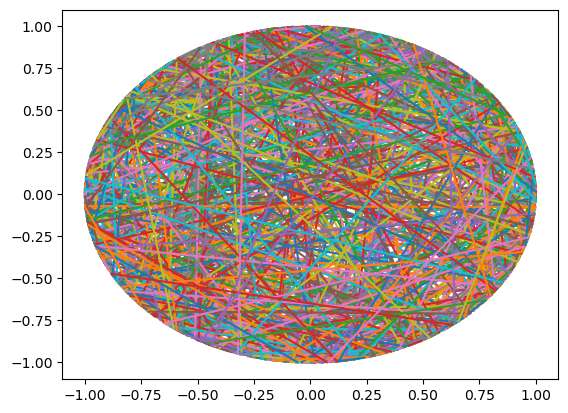

The probability is: 0.342


In [17]:
sol1(1, 1000)

### 2nd approach

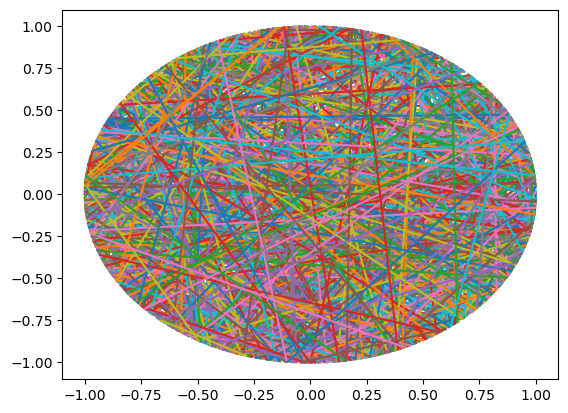

The probability is: 0.485


In [14]:
sol2(1, 1000)

### 3rd approach

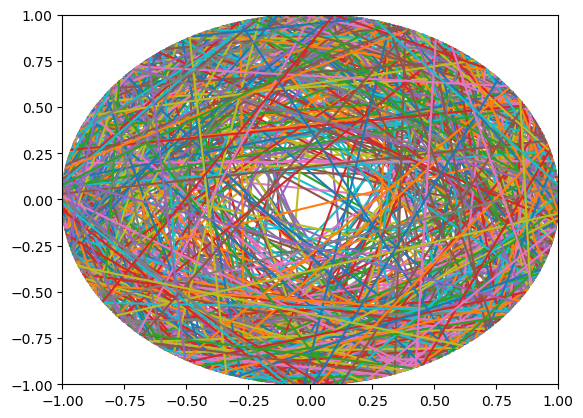

The probability is: 0.266


In [19]:
sol3(1, 1000)